In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [107]:
print('\n VIN (1-10) - это номер машины, тип строка \n',
      'County - округ, тип строка \n',
      'City - город, тип строка \n',
      'State - штат США, тип строка \n',
     'Postal Code - почтовый индекс, тип строка \n',
     'Model Year - год выпуска, тип численный \n',
     'Model - Модель машины, тип строка \n',
     'Electric Vehicle Type - тип электроческого транспорта, тип строка\n',
     'Clean Alternative Fuel Vehicle (CAFV) Eligibility - льготная программ в США, тип строка /n',
     'Electric Range - запас хода, тип численный \n',
     'Base MSRP - базовая розничная цена, стоимость \n',
     'Legislative District - законодальный округ, тип численный \n',
     'DOL Vehicle ID - идентификатор автомобиля, тип численный \n',
     'Vehicle Location - местоположение автомобиля, координаты\n',
     'Electric Utility - электроснабжение, тип строка \n',
     '2020 Census Tract - Участок перепеси населения в 2020 году, координаты\n')


 VIN (1-10) - это номер машины, тип строка 
 County - округ, тип строка 
 City - город, тип строка 
 State - штат США, тип строка 
 Postal Code - почтовый индекс, тип строка 
 Model Year - год выпуска, тип численный 
 Model - Модель машины, тип строка 
 Electric Vehicle Type - тип электроческого транспорта, тип строка
 Clean Alternative Fuel Vehicle (CAFV) Eligibility - льготная программ в США, тип строка /n Electric Range - запас хода, тип численный 
 Base MSRP - базовая розничная цена 
 Legislative District - законодальный округ, тип численный 
 DOL Vehicle ID - идентификатор автомобиля, тип численный 
 Vehicle Location - местоположение автомобиля
 Electric Utility - электроснабжение, тип строка 
 2020 Census Tract - Участок перепеси населения в 2020 году



In [34]:

df=pd.read_csv('/home/nastya/Загрузки/Electric_Vehicle_Population_Data.csv')
#df.loc[[0,1], 'Model Year']
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMAB3FV3P,Kitsap,Seabeck,WA,98380.0,2023,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,35.0,240684006,POINT (-122.8728334 47.5798304),PUGET SOUND ENERGY INC,5.303509e+10
1,1N4AZ1CP6J,Kitsap,Bremerton,WA,98312.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151.0,0.0,35.0,474183811,POINT (-122.6961203 47.5759584),PUGET SOUND ENERGY INC,5.303508e+10
2,5YJ3E1EA4L,King,Seattle,WA,98101.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.0,0.0,43.0,113120017,POINT (-122.3340795 47.6099315),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP8E,King,Seattle,WA,98125.0,2014,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,46.0,108188713,POINT (-122.304356 47.715668),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
4,1G1FX6S00H,Thurston,Yelm,WA,98597.0,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.0,0.0,20.0,176448940,POINT (-122.5715761 46.9095798),PUGET SOUND ENERGY INC,5.306701e+10


In [122]:
print('Общее количество единиц техники: ')
df['VIN (1-10)'].count() 

Общее количество единиц техники: 


205439

In [112]:
print('Последний год выпуска электромобиля:')
df['Model Year'].max()

Последний год выпуска электромобиля


2025

In [114]:
print('Первый год выпуска электромобиля:')
df['Model Year'].min()

Первый год выпуска электромобиля:


1997

In [115]:
print('Средний год выпуска электромобиля:')
df['Model Year'].mean()

Средний год выпуска электромобиля:


2020.9603629301155

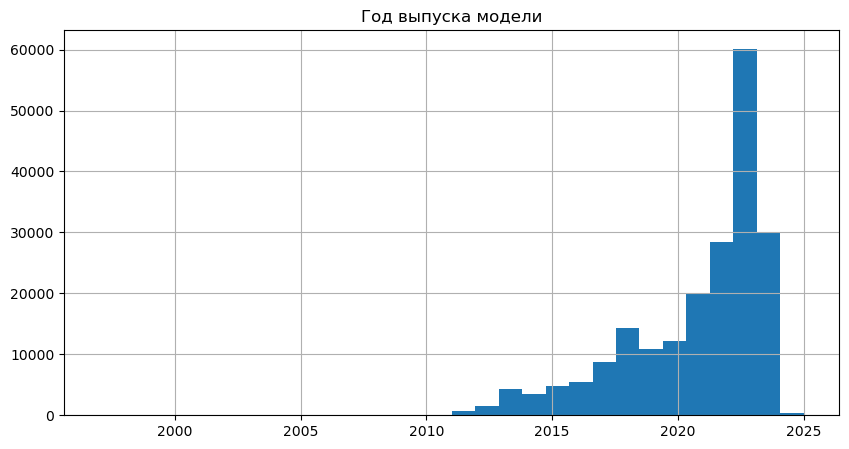

Количетсво выбросов:  768
Процент выбросов:  0.0037383359537380926
Количетсво потерянных единиц:  0


In [140]:
plt.figure(figsize=(10, 5))
plt.hist(df['Model Year'], bins=30)
plt.grid(True)
plt.title('Год выпуска модели')
plt.show()
z = np.abs(stats.zscore(df['Model Year']))
threshold = 3
outliers = df[z > threshold]
print('Количетсво выбросов: ', outliers['Model Year'].count())
print('Процент выбросов: ', outliers['Model Year'].count()/df['Model Year'].count())
print('Количество потерянных единиц: ',df['Model Year'].isna().sum())

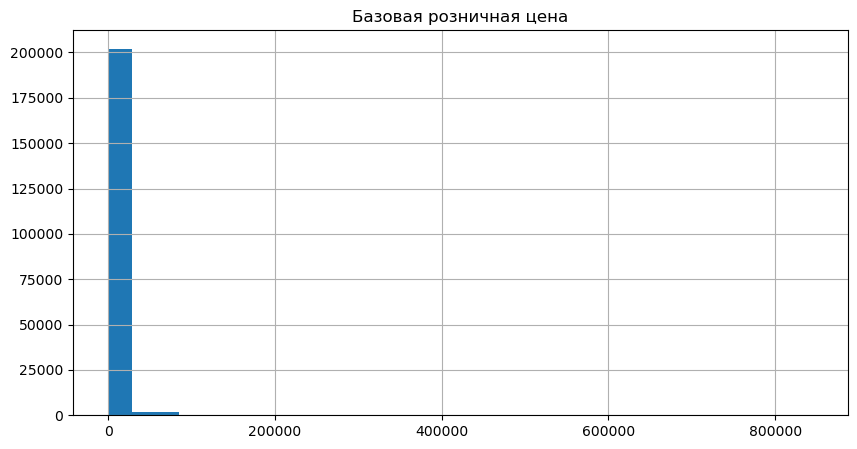

Количетсво выбросов:  0
Процент выбросов:  0.0
Количество потерянных единиц:  8


In [141]:
plt.figure(figsize=(10, 5))
plt.hist(df['Base MSRP'], bins=30)
plt.grid(True)
plt.title('Базовая розничная цена')
plt.show()
z = np.abs(stats.zscore(df['Base MSRP']))
threshold = 3
outliers = df[z > threshold]
print('Количетсво выбросов: ', outliers['Base MSRP'].count())
print('Процент выбросов: ', outliers['Base MSRP'].count()/df['Base MSRP'].count())
print('Количество потерянных единиц: ',df['Base MSRP'].isna().sum())

In [142]:
print('Максимальный запас хода :')
df['Electric Range'].max()

Максимальный запас хода :


337.0

In [143]:
print('Минимальный запас хода :')
df['Electric Range'].min()

Минимальный запас хода :


0.0

In [144]:
print('Средний запас хода :')
df['Electric Range'].mean()

Средний запас хода :


52.164342285244196

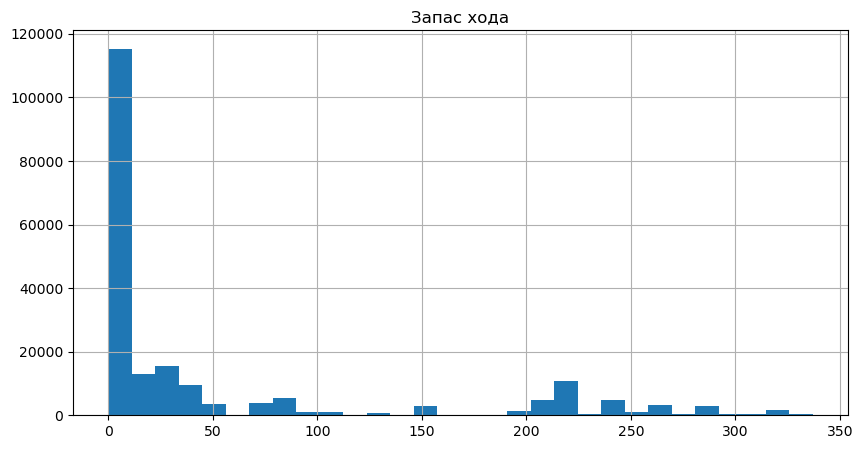

Количетсво выбросов:  0
Процент выбросов:  0.0
Количество потерянных единиц:  8


In [145]:
plt.figure(figsize=(10, 5))
plt.hist(df['Electric Range'], bins=30)
plt.grid(True)
plt.title('Запас хода')
plt.show()
z = np.abs(stats.zscore(df['Electric Range']))
threshold = 3
outliers = df[z > threshold]
print('Количетсво выбросов: ', outliers['Electric Range'].count())
print('Процент выбросов: ', outliers['Electric Range'].count()/df['Electric Range'].count())
print('Количество потерянных единиц: ',df['Electric Range'].isna().sum())

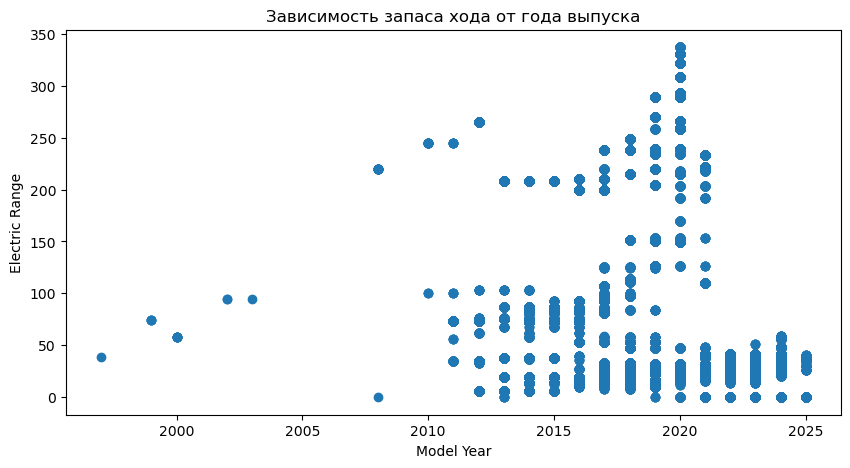

Корреляции не выявлено, т.к. пик запаса хода приходится не на первый и не на последний год


In [147]:
plt.figure(figsize=(10, 5))
plt.scatter(df['Model Year'], df['Electric Range'])
plt.xlabel('Model Year')
plt.ylabel('Electric Range')
plt.title('Зависимость запаса хода от года выпуска')
plt.show()
print('Корреляции не выявлено, т.к. пик запаса хода приходится не на первый и не на последний год')

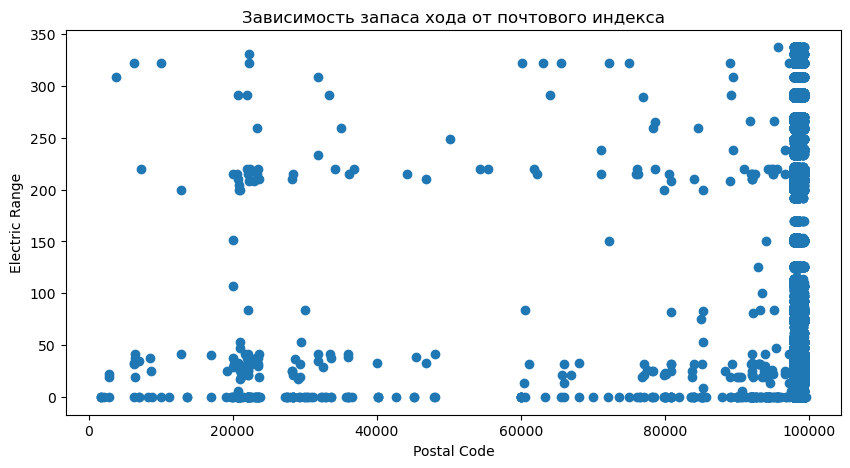

Корреляции не выявлено, т.к. большиство почтовых индексов находятся в узком диапазоне и не зависят от запаса хода


In [153]:
plt.figure(figsize=(10, 5))
plt.scatter(df['Postal Code'], df['Electric Range'])
plt.xlabel('Postal Code')
plt.ylabel('Electric Range')
plt.title('Зависимость запаса хода от почтового индекса')
plt.show()
print('Корреляции не выявлено, т.к. большиство почтовых индексов находятся в узком диапазоне и не зависят от запаса хода')

In [154]:
print('Перечень округов: ')
df['County'].unique()

Перечень округов: 


array(['Kitsap', 'King', 'Thurston', 'Snohomish', 'Yakima', 'Island',
       'Skagit', 'Spokane', 'Clallam', 'Chelan', 'Walla Walla',
       'Kittitas', 'Whitman', 'Stevens', 'Grant', 'Douglas', 'Clark',
       'Cowlitz', 'Jefferson', 'Klickitat', 'Pierce', 'Franklin',
       'Whatcom', 'San Juan', 'Columbia', 'Grays Harbor', 'Lewis',
       'Benton', 'Pacific', 'Mason', 'Platte', 'Monterey', 'Wahkiakum',
       'Norfolk', 'Okanogan', 'Cumberland', 'Skamania', "Prince George's",
       'Garfield', 'Pend Oreille', 'Asotin', 'Lincoln', 'Adams',
       'San Diego', 'Oldham', 'York', 'Orange', 'Wake', 'Los Angeles',
       'Sonoma', 'Ferry', 'Churchill', 'DeKalb', 'Goochland', 'Stafford',
       'Contra Costa', 'Riverside', 'Loudoun', 'Allen', 'James City',
       'Anne Arundel', 'Madison', 'Isle of Wight', 'Leavenworth',
       'Charles', 'Sarpy', 'Kings', 'Ventura', 'San Mateo', 'Sacramento',
       'Maui', nan, 'Ada', 'Mobile', 'District of Columbia', 'New York',
       'Multnomah', 'Fa

In [156]:
print('Самый популярный производитель: ')
df['Make'].mode()

Самый популярный производитель: 


0    TESLA
Name: Make, dtype: object

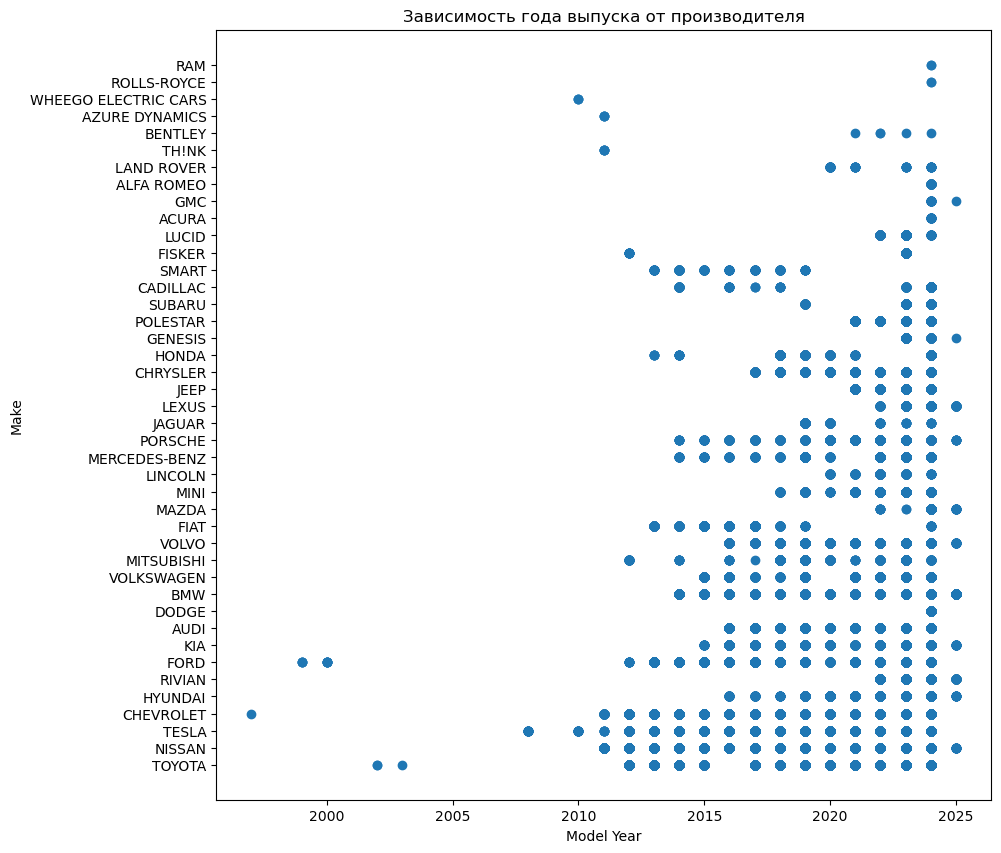

Корреляция есть между годом и наличием модели этого года, можно проследить, что со временем стало больше производителей, делающих электромобили


In [157]:
plt.figure(figsize=(10, 10))
plt.scatter(df['Model Year'], df['Make'])
plt.xlabel('Model Year')
plt.ylabel('Make')
plt.title('Зависимость года выпуска от производителя')
plt.show()
print('Корреляция есть между годом и наличием модели этого года, можно проследить, что со временем стало больше производителей, делающих электромобили')

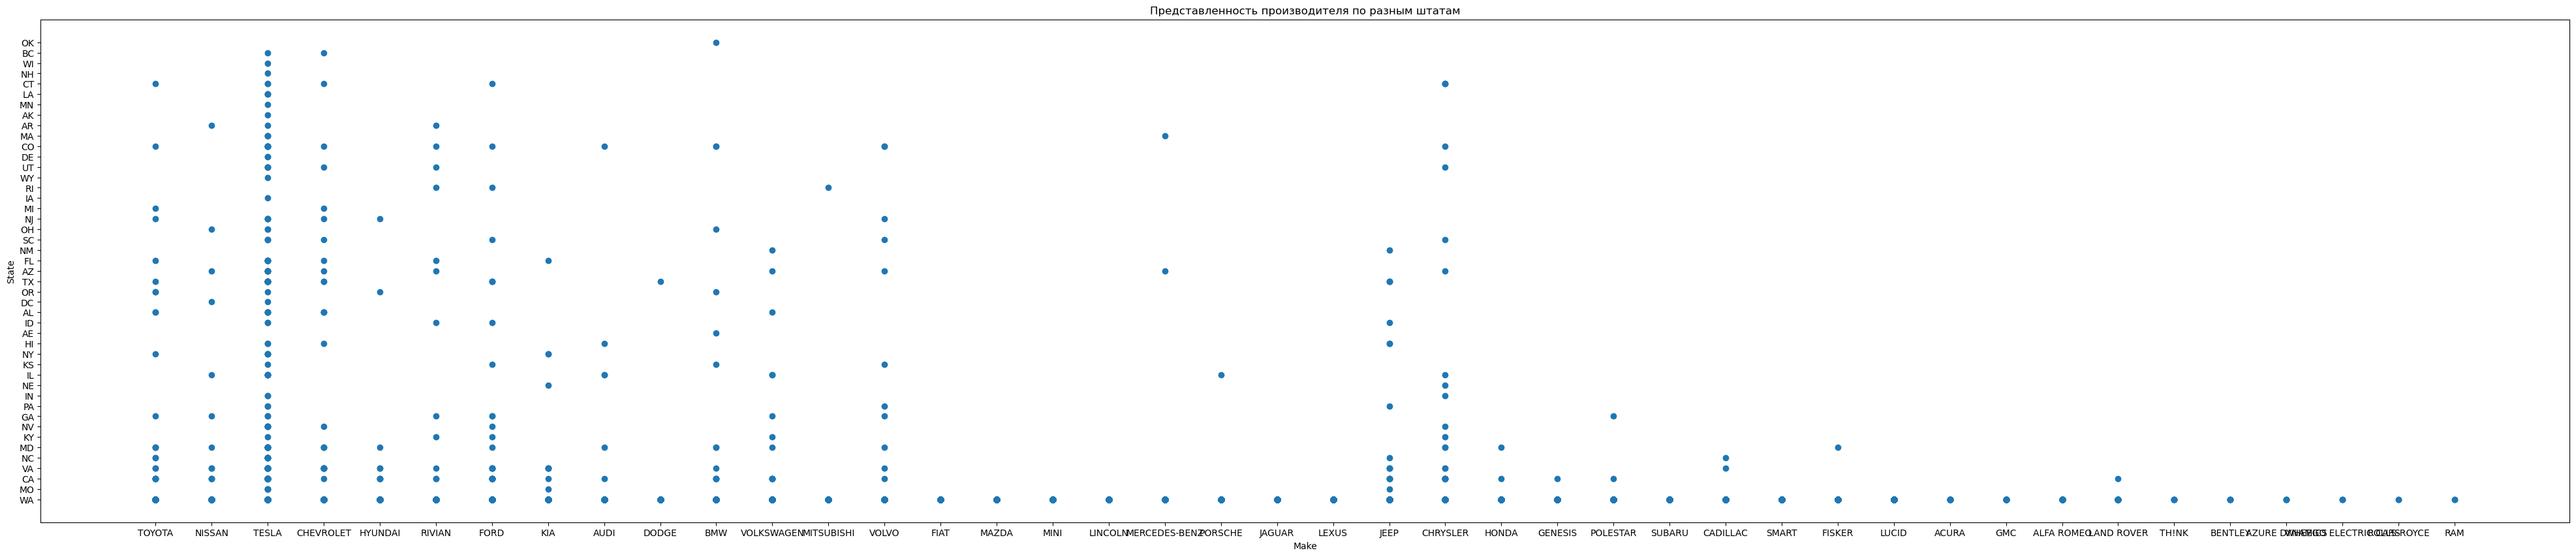

Tesla представлена больше остальных, что положительно коррелирует с тем, что это это самый популярный производитель


In [158]:
plt.figure(figsize=(50, 10))
plt.scatter(df['Make'], df['State'])
plt.xlabel('Make')
plt.ylabel('State')
plt.title('Представленность производителя по разным штатам')
plt.show()
print('Tesla представлена больше остальных, что положительно коррелирует с тем, что это это самый популярный производитель')

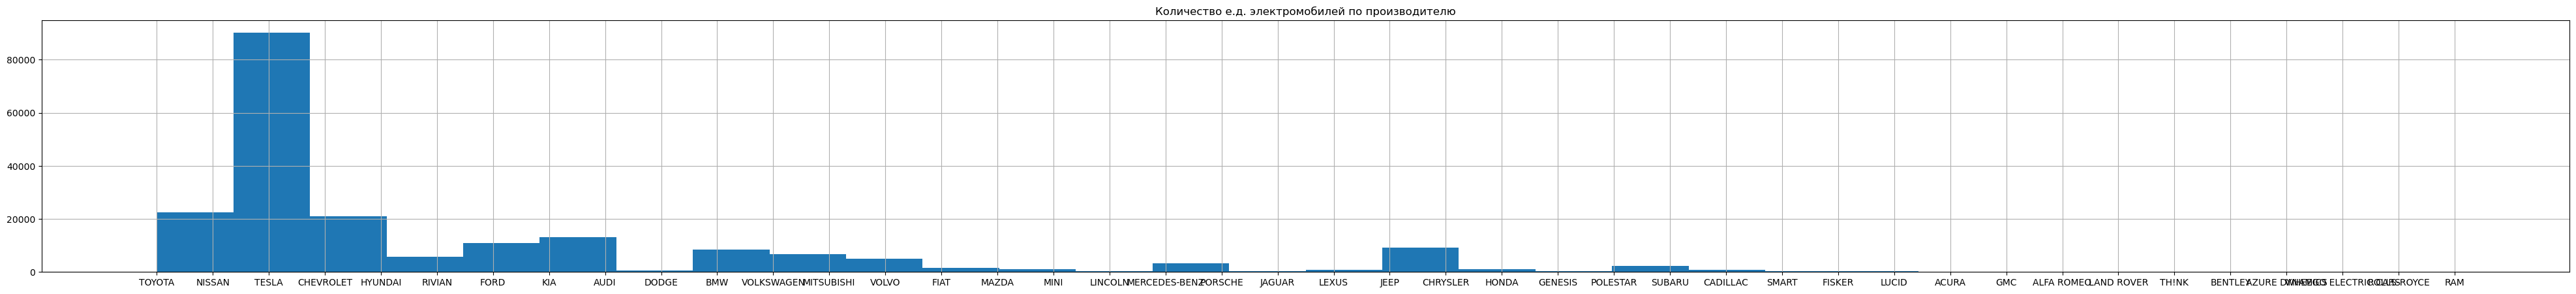

Больше всех имеется электромобилей Tesla, что положительно коррелируется с ее представленностью по штатам США


In [161]:
plt.figure(figsize=(50, 5))
plt.hist(df['Make'], bins=30)
plt.grid(True)
plt.title('Количество е.д. электромобилей по производителю')
plt.show()
print('Больше всех имеется электромобилей Tesla, что положительно коррелируется с ее представленностью по штатам США')